In [363]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [364]:
df = pd.read_excel('to_clust.xlsx')
df.head()

,Код ЦФО_ГИД,Наименование ЦФО,Дивизион,"ССЧ, чел.","Материальные активы, тыс. руб."
0,1020000000_2,ВНИИА,ЯОК,6169,41658232
1,1070000000_6,Маяк,ЯОК,11964,59751006
2,1100000000_9,ПСЗ,ЯОК,5711,29346241
3,1110000000_10,ВНИИТФ,ЯОК,10035,36644965
4,1120000000_592328,УЭМЗ,ЯОК,3091,9807274


In [365]:
df2 = pd.read_excel('to_clust.xlsx', sheet_name=1)
df2[df2['Дата']=='2020-12-31'].pivot_table(index=['Код ЦФО_ГИД'], 
            columns=['Коэффициенты'], values='Значения').fillna(0).reset_index().to_excel('grouped_by_CFO_2020.xlsx', index=False)

df2[df2['Дата']=='2019-12-31'].pivot_table(index=['Код ЦФО_ГИД'], 
            columns=['Коэффициенты'], values='Значения').fillna(0).reset_index().to_excel('grouped_by_CFO_2020.xlsx', index=False)

In [366]:
# df.pivot_table(index=['Код ЦФО_ГИД','Дата'], 
#             columns=['Коэффициенты'], values='Значения').fillna(0).reset_index().pivot_table(index=['Код ЦФО_ГИД'], 
#             columns=['Дата'], values=['In_OCF / Out_OCF', 'ROS_Oper']).reset_index()

In [367]:
dfg = pd.read_excel('grouped_by_CFO.xlsx')
dfg.head()

,Код ЦФО_ГИД,In_OCF / Out_OCF,ROS_Oper
0,1020000000_2,1.093160,0.140610
1,1070000000_6,1.076699,0.028221
2,1100000000_9,1.047484,0.030151
3,1110000000_10,0.000000,0.070801
4,1120000000_592328,0.981733,-0.002086


In [368]:
df_to_clust = pd.merge(df, dfg, left_on='Код ЦФО_ГИД', right_on='Код ЦФО_ГИД', how='left')
df_to_clust.head()

,Код ЦФО_ГИД,Наименование ЦФО,Дивизион,"ССЧ, чел.","Материальные активы, тыс. руб.",In_OCF / Out_OCF,ROS_Oper
0,1020000000_2,ВНИИА,ЯОК,6169,41658232,1.093160,0.140610
1,1070000000_6,Маяк,ЯОК,11964,59751006,1.076699,0.028221
2,1100000000_9,ПСЗ,ЯОК,5711,29346241,1.047484,0.030151
3,1110000000_10,ВНИИТФ,ЯОК,10035,36644965,0.000000,0.070801
4,1120000000_592328,УЭМЗ,ЯОК,3091,9807274,0.981733,-0.002086


In [369]:
df_to_clust.columns

Index(['Код ЦФО_ГИД', 'Наименование ЦФО', 'Дивизион', 'ССЧ, чел.',
       'Материальные активы, тыс. руб.', 'In_OCF / Out_OCF', 'ROS_Oper'],
      dtype='object')

In [370]:
X = df_to_clust[[ 'ССЧ, чел.','Материальные активы, тыс. руб.', 'In_OCF / Out_OCF', 'ROS_Oper']]
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [412]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)

In [413]:
kmeans.labels_

array([2, 2, 2, 2, 2, 0, 2, 3, 0, 3, 1, 1, 3, 1, 0, 1, 3, 3, 3, 3, 3, 0,
       0, 1, 2, 0, 2, 3, 2, 0, 0, 1, 2, 1, 1, 2, 3, 3, 0, 0, 0, 3, 0, 0,
       3, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 0, 3, 3, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 2, 1, 1, 0, 2, 0, 2, 3, 2, 2, 3, 3, 1, 3, 3, 2, 3, 1, 3, 2,
       1, 2, 0, 1, 3, 0, 3, 0, 0, 3, 2, 1, 0, 3, 0, 1, 0, 0, 1, 2, 2, 1,
       1, 3, 1, 3, 1, 1, 1, 2, 3, 3, 3, 0, 1, 1, 1, 1, 3, 0, 0, 1, 0, 0,
       2, 0, 1, 1, 3, 3, 2, 1])

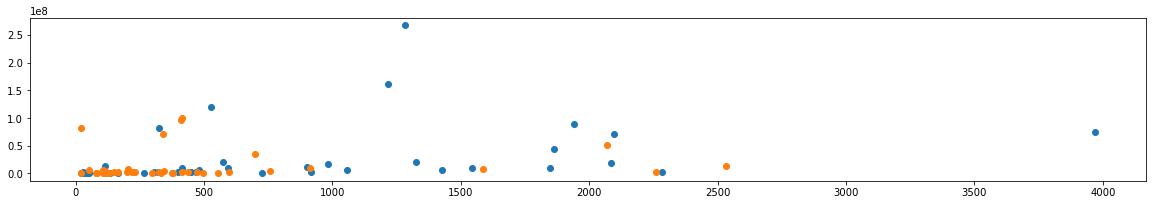

In [414]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[['ССЧ, чел.','Материальные активы, тыс. руб.']][kmeans.labels_ == 0].values
filtered_label1 = df[['ССЧ, чел.','Материальные активы, тыс. руб.']][kmeans.labels_ == 1].values
filtered_label2 = df[['ССЧ, чел.','Материальные активы, тыс. руб.']][kmeans.labels_ == 4].values
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1])
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1])
plt.show()


No handles with labels found to put in legend.


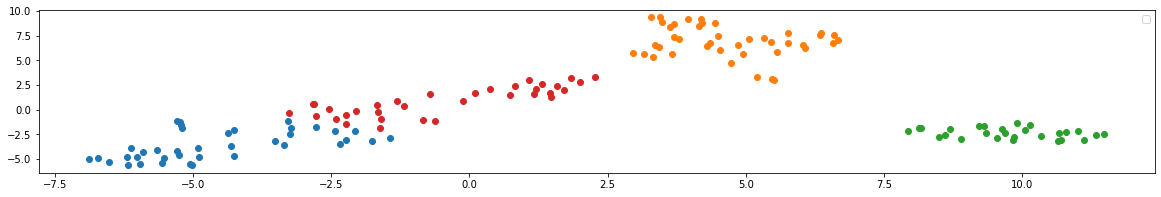

In [415]:
u_labels = np.unique(kmeans.labels_)
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[kmeans.labels_ == i][:,0] , X[kmeans.labels_ == i][:,1])
plt.legend()
plt.show()

In [393]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.manifold import TSNE

Automatically created module for IPython interactive environment


In [399]:
X= TSNE(n_components=2).fit_transform(X)

Estimated number of clusters: 7
Estimated number of noise points: 7
Silhouette Coefficient: 0.524


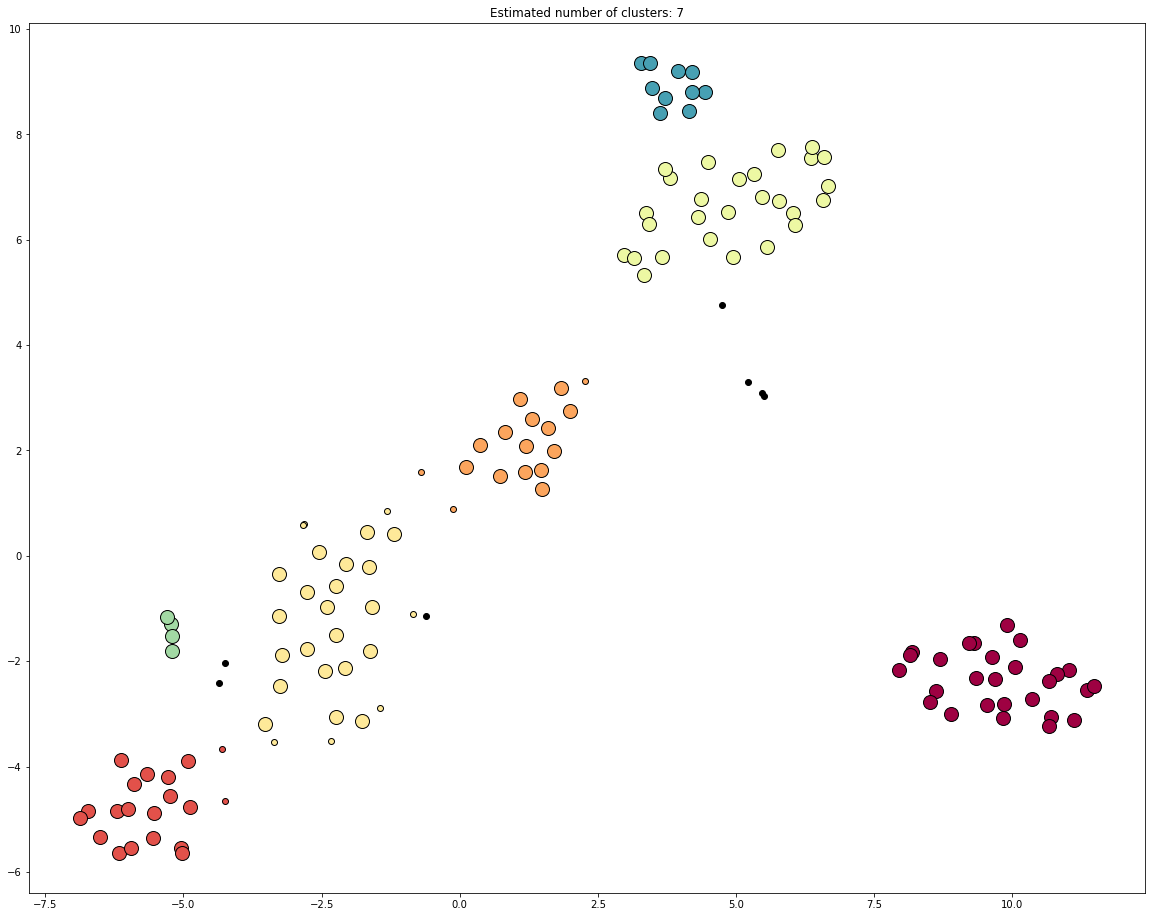

In [423]:
# Compute DBSCAN

plt.figure(figsize=(20,16))
db = DBSCAN(eps=0.92, min_samples=4).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()